In [1]:
#basic librarires 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import LabelEncoder

#machine learning models
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold

#feature selection
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import r2_score
from sklearn import ensemble

In [100]:
df=pd.read_csv('Training Data Set_N.csv')

In [101]:
df.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180,7,auto,4,5,diesel,3085561.50


In [4]:
df.shape

(53515, 17)

In [102]:
df.shape

(52076, 16)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52076 entries, 0 to 52075
Data columns (total 16 columns):
Id                     52076 non-null int64
Maker                  52076 non-null object
model                  52076 non-null object
Location               52076 non-null object
distance               51119 non-null float64
Owner Type             52076 non-null object
manufacture_year       52076 non-null int64
Age of car             52076 non-null int64
engine_displacement    52076 non-null int64
engine_power           52076 non-null int64
Vroom Audit Rating     52076 non-null int64
transmission           52076 non-null object
door_count             52076 non-null object
seat_count             52076 non-null object
fuel_type              52076 non-null object
Price                  52076 non-null float64
dtypes: float64(2), int64(6), object(8)
memory usage: 6.4+ MB


In [66]:
le=LabelEncoder()    # label encoding

df['Maker']=le.fit_transform(df['Maker']) #dataframe method

df.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,6,octavia,Ahmedabad,NaN,Second,1964,55,1964,147,8,man,None,None,petrol,543764.25
1,25002,2,panda,Ahmedabad,27750.0,Third,2012,7,1242,51,6,man,4,4,petrol,401819.25
2,25003,1,x1,Hyderabad,46000.0,Third,2014,5,1995,105,7,auto,4,5,diesel,2392855.50
3,25004,5,juke,Mumbai,43949.0,Third,2011,8,1618,140,7,man,4,5,petrol,958606.50
4,25005,1,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180,7,auto,4,5,diesel,3085561.50


In [69]:
df['model']=le.fit_transform(df['model'])
df['Owner Type']=le.fit_transform(df['Owner Type'])
df['transmission']=le.fit_transform(df['transmission'])
df['fuel_type']=le.fit_transform(df['fuel_type'])
df['Location']=le.fit_transform(df['Location'])
df['door_count']=le.fit_transform(df['door_count'])
df['seat_count']=le.fit_transform(df['seat_count'])

In [70]:
df.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,6,8,0,NaN,2,1964,55,1964,147,8,1,6,9,1,543764.25
1,25002,2,9,0,27750.0,3,2012,7,1242,51,6,1,3,3,1,401819.25
2,25003,1,18,5,46000.0,3,2014,5,1995,105,7,0,3,4,0,2392855.50
3,25004,5,6,9,43949.0,3,2011,8,1618,140,7,1,3,4,1,958606.50
4,25005,1,20,6,59524.0,1,2012,7,2993,180,7,0,3,4,0,3085561.50


In [45]:
df.describe()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,fuel_type,Price
count,53515.000000,53515.000000,53515.000000,53515.000000,5.230400e+04,53515.000000,53515.000000,53515.000000,53515.000000,52076.000000,53515.000000,53515.000000,53515.000000,5.351500e+04
mean,51758.000000,4.287078,11.239933,5.009754,9.454626e+04,1.499841,2010.408110,8.591890,1904.049014,100.448345,5.998374,0.686424,0.485023,1.098084e+06
std,15448.594165,2.554941,6.166907,3.157117,2.755617e+05,1.118771,4.650322,4.650322,1496.564596,45.330622,1.418336,0.463950,0.499780,8.441565e+05
min,25001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1934.000000,3.000000,14.000000,10.000000,4.000000,0.000000,0.000000,3.000000e+00
25%,38379.500000,1.000000,8.000000,2.000000,1.549000e+04,0.000000,2008.000000,5.000000,1395.000000,73.000000,5.000000,0.000000,0.000000,5.051812e+05
50%,51758.000000,6.000000,10.000000,5.000000,6.552000e+04,2.000000,2011.000000,8.000000,1896.000000,91.000000,6.000000,1.000000,0.000000,8.854552e+05
75%,65136.500000,6.000000,16.000000,8.000000,1.356410e+05,3.000000,2014.000000,11.000000,1995.000000,125.000000,7.000000,1.000000,1.000000,1.477829e+06
max,78515.000000,7.000000,22.000000,10.000000,9.899800e+06,3.000000,2016.000000,85.000000,32000.000000,896.000000,8.000000,1.000000,1.000000,2.212078e+07


In [73]:
df['distance'].fillna('?', inplace=True)
distance = df['distance'].loc[df['distance'] != '?']
dmean = distance.astype(float).astype(int).mean()
df['distance'] = df['distance'].replace('?',dmean).astype(int)
df['distance'].head()

0    92953
1    27750
2    46000
3    43949
4    59524
Name: distance, dtype: int32

In [51]:
df=df.drop('body_type',axis=1)

In [52]:
df.shape

(53515, 16)

In [75]:
y=df['Price']
X=df.drop('Price',axis=1)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52076 entries, 0 to 52075
Data columns (total 16 columns):
Id                     52076 non-null int64
Maker                  52076 non-null int32
model                  52076 non-null int32
Location               52076 non-null int32
distance               52076 non-null int32
Owner Type             52076 non-null int32
manufacture_year       52076 non-null int64
Age of car             52076 non-null int64
engine_displacement    52076 non-null int64
engine_power           52076 non-null int64
Vroom Audit Rating     52076 non-null int64
transmission           52076 non-null int32
door_count             52076 non-null int32
seat_count             52076 non-null int32
fuel_type              52076 non-null int32
Price                  52076 non-null float64
dtypes: float64(1), int32(9), int64(6)
memory usage: 4.6 MB


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [77]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'\nR^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.6914723547107735

R^2 score for test: 0.6941879124439787


In [78]:
Xc = sm.add_constant(X)
lin_reg = sm.OLS(y,Xc).fit()
lin_reg.summary()

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     8368.
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:42:29   Log-Likelihood:            -7.5402e+05
No. Observations:               52076   AIC:                         1.508e+06
Df Residuals:                   52061   BIC:                         1.508e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -37.5576      0.231   -162.844      0.000     -38.010     -37.106
Id                      0.0664      0.133      0.498      0.619      -0.195       0.328
Maker               -8.183e+04   1030.369    -79.422      0.000   -8.39e+04   -7.98e+04
model                3967.0986    349.893     11.338      0.000    3281.306    4652.891
Location              514.9301    652.508      0.789      0.430    -763.992    1793.852
distance               -0.2120      0.009    -23.918      0.000      -0.229      -0.195
Owner Type          -3678.6444   1840.946     -1.998      0.046   -7286.916     -70.372
manufacture_year      818.6475      8.926     91.717      0.000     801.153     836.142
Age of car          -7.665e+04    466.797   -164.199      0.000   -7.76e+04   -7.57e+04
engine_displacement     2.5442      1.870      1.360      0.174      -1.121       6.210
engine_power         6651.7411     64.365    103.344      0.000    6525.585    6777.897
Vroom Audit Rating   1618.0750   1451.721      1.115      0.265   -1227.313    4463.463
transmission        -2.766e+05   5331.991    -51.884      0.000   -2.87e+05   -2.66e+05
door_count          -2258.3198   2250.237     -1.004      0.316   -6668.806    2152.166
seat_count           1542.7961   1352.994      1.140      0.254   -1109.084    4194.677
fuel_type           -1.154e+05   4453.117    -25.917      0.000   -1.24e+05   -1.07e+05
==============================================================================
Omnibus:                    54692.953   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24581683.825
Skew:                           4.597   Prob(JB):                         0.00
Kurtosis:                     109.039   Cond. No.                     1.72e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
xc=sm.add_constant(X)

In [80]:
import scipy.stats as stats
print(np.abs(round(stats.norm.isf(q = 0.025),2)))

1.96


In [81]:
X_bar = np.mean(X_train)
mu = np.mean(df)
sigma = np.std(df)
n = X_train.shape[0]
Z = (X_bar - mu)/(sigma/np.sqrt(n))
print('z_observed value is : ', Z)

z_observed value is :  Age of car            -0.244893
Id                    -0.174554
Location               0.374352
Maker                  0.023982
Owner Type             1.204118
Price                       NaN
Vroom Audit Rating    -1.126054
distance              -0.284405
door_count             0.151974
engine_displacement   -0.474111
engine_power          -1.320376
fuel_type             -0.310217
manufacture_year       0.244893
model                 -0.918460
seat_count            -0.287714
transmission           0.626170
dtype: float64


In [82]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

print("RMSE:%.2f"% np.sqrt(mean_squared_error(y_test, y_predicted)))

R2 sq:  0.9229399912435434
Mean squared error: 64456691409.34
Test Variance score: 0.91
RMSE:253883.22


In [84]:
print(f'R^2 score for train: {model.score(X_train, y_train)}')
print(f'\nR^2 score for test: {model.score(X_test, y_test)}')

R^2 score for train: 0.9229399912435434

R^2 score for test: 0.9107909259398201


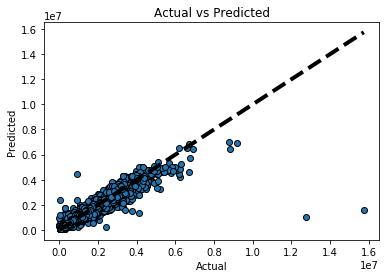

In [86]:
 from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [97]:
New=pd.DataFrame({"Unique Id":df.Id, "Price":y_predicted})

ValueError: array length 15623 does not match index length 52076

In [ ]:
df.to_csv('NK1.csv')



In [103]:
df.shape

(52076, 16)

In [105]:
len(y_predicted)

15623

In [106]:
df1=pd.read_csv("Test Data Set.csv")

In [109]:
df1.shape

(5615, 16)

In [111]:
df1=df1.drop('body_type',axis=1)

In [114]:
df1['Distance '].fillna('?', inplace=True)
distance1 = df1['Distance '].loc[df1['Distance '] != '?']
dmean = distance1.astype(float).astype(int).mean()
df1['Distance '] = df1['Distance '].replace('?',dmean).astype(int)
df1['Distance '].head()

0    150000
1     29376
2     30563
3      8650
4      6400
Name: Distance , dtype: int32

In [127]:
df1['model']=le.fit_transform(df1['model'])
df1['Owner Type']=le.fit_transform(df1['Owner Type'])
df1['transmission']=le.fit_transform(df1['transmission'])
df1['fuel_type']=le.fit_transform(df1['fuel_type'])
df1['Location']=le.fit_transform(df1['Location'])
df1['door_count']=le.fit_transform(df1['door_count'])
df1['seat_count']=le.fit_transform(df1['seat_count'])
df1['Maker']=le.fit_transform(df1['Maker'])

In [132]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 15 columns):
Id                     5615 non-null int64
Maker                  5615 non-null int64
model                  5615 non-null int64
Location               5615 non-null int64
Distance               5615 non-null int32
Owner Type             5615 non-null int64
manufacture_year       5615 non-null int64
Age of car             5615 non-null int64
engine_displacement    5615 non-null int64
engine_power           5447 non-null float64
Vroom Audit Rating     5615 non-null int64
transmission           5615 non-null int64
door_count             5615 non-null int64
seat_count             5615 non-null int64
fuel_type              5615 non-null int64
dtypes: float64(1), int32(1), int64(13)
memory usage: 636.2 KB


In [134]:
df1['engine_power'].fillna('?', inplace=True)
eng = df1['engine_power'].loc[df1['engine_power'] != '?']
dmean = eng.astype(float).astype(int).mean()
df1['engine_power'] = df1['engine_power'].replace('?',dmean).astype(int)
df1['engine_power'].head()

0     75
1     77
2    110
3    110
4    169
Name: engine_power, dtype: int32

In [135]:
df1.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,6,8,9,150000,0,2007,12,1595,75,5,1,2,3,1
1,11002,6,14,3,29376,3,2014,5,1598,77,4,1,2,3,0
2,11003,6,8,3,30563,2,2014,5,1968,110,5,1,3,3,0
3,11004,0,10,4,8650,1,2015,4,1968,110,8,0,2,3,0
4,11005,0,17,2,6400,3,2015,4,1984,169,4,0,0,5,1


In [137]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 15 columns):
Id                     5615 non-null int64
Maker                  5615 non-null int64
model                  5615 non-null int64
Location               5615 non-null int64
Distance               5615 non-null int32
Owner Type             5615 non-null int64
manufacture_year       5615 non-null int64
Age of car             5615 non-null int64
engine_displacement    5615 non-null int64
engine_power           5615 non-null int32
Vroom Audit Rating     5615 non-null int64
transmission           5615 non-null int64
door_count             5615 non-null int64
seat_count             5615 non-null int64
fuel_type              5615 non-null int64
dtypes: int32(2), int64(13)
memory usage: 614.2 KB


In [138]:
X=df1

In [141]:
y_pre=model.predict(X)

In [143]:
df2= pd.DataFrame({'Unique Id': df1.Id, 'Price': y_pre})
df2.to_csv('NK.csv')

In [131]:
df1.isnull().sum()

Id                       0
Maker                    0
model                    0
Location                 0
Distance                 0
Owner Type               0
manufacture_year         0
Age of car               0
engine_displacement      0
engine_power           168
Vroom Audit Rating       0
transmission             0
door_count               0
seat_count               0
fuel_type                0
dtype: int64